# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization superpowers, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

Instructions:

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using the integration between Plotly and the Mapbox API. Be sure to create your environment file (`.env`) and include your Mapbox API access token. Then import your Mapbox API access token into the `san_francisco_housing.ipynb` notebook, and set it by using the `px.set_mapbox_access_token` function.

Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

##### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

##### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

##### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

##### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

##### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [9]:
# Import the required libraries and dependencies
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

## Enable your Mapbox API access token

In [10]:
# Load the .env file into the notebook

load_dotenv()

True

In [11]:
# Read in your MAPBOX_API_KEY
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm the availability of your Mapbox API access token by checking its type
type(mapbox_api_access_token)

# Set your Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

In [31]:
type(mapbox_api_access_token)

str

## Import the data 

In [32]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path("./Resources/sfo_neighborhoods_census_data.csv")
)
# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [33]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.groupby("year").mean()

# Review the DataFrame
housing_units_by_year


,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [34]:
# Create a visual aggregation explore the housing units by year

housing_units_by_year.hvplot.bar(rot = 45, x = "year", y = "housing_units", bar_width = .80, hover_color = "red").opts(yformatter='%.0f')



:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question** What is the overall trend in housing_units over the period being analyzed?

**Answer** # The overall trend in housing units between 2010 and 2016 was fairly static. The number of housing units increased slightly from 372560 units in 2010 to 384242 units in 2016, which represents roughly a 3% increase over the time period.

---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [35]:
# Create a numerical aggregation by grouping the data by year and averaging the results

prices_square_foot_by_year = sfo_data_df.groupby("year").mean()

# Review the resulting DataFrame
display(prices_square_foot_by_year.sort_values("sale_price_sqr_foot"))
display(prices_square_foot_by_year.sort_values("gross_rent"))

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2011,341.903429,374507.0,1530.0
2010,369.344353,372560.0,1239.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


In [36]:
prices_square_foot_by_year.drop(columns = "housing_units", inplace = True)

**Question** What is the lowest gross rent reported for the years included in the DataFrame?

**Answer** The lowest gross rent was in the year 2010, with a gross rent value 

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [37]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
prices_square_foot_by_year.hvplot(title = "Prices / Square Foot SF Real Estate", x = "year", y = ["gross_rent", "sale_price_sqr_foot"], xlabel = "year", ylabel = "Value")


:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question** * Did any year experience a drop in the average sale price per square foot compared to the previous year?

**Answer** From 2010-2011, there was a small derease in the average sale price per square foot, but otherwise sale price has been increasing steadily ever since 2011.

**Question** * If so, did the gross rent increase or decrease during that year?I

**Answer** The gross rent increased that year regardless of the small drop in average sale price.

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [38]:
sfo_data_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [39]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = sfo_data_df.groupby(["neighborhood", "year"]).mean()

# Review the DataFrame
prices_by_year_by_neighborhood.head()


sale_price_sqr_foot  housing_units  gross_rent
neighborhood year                                                
Alamo Square 2010           291.182945       372560.0      1239.0
             2011           272.527310       374507.0      1530.0
             2012           183.099317       376454.0      2324.0
             2013           387.794144       378401.0      2971.0
             2014           484.443552       380348.0      3528.0

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [40]:
# Filter out the housing_units
neighborhood_grouping_df = prices_by_year_by_neighborhood.drop(columns = "housing_units")

# Review the first and last five rows of the DataFrame
# neighborhood_grouping_df.head()

# prices_by_year_by_neighborhood.head()
neighborhood_grouping_df.head()

sale_price_sqr_foot  gross_rent
neighborhood year                                 
Alamo Square 2010           291.182945      1239.0
             2011           272.527310      1530.0
             2012           183.099317      2324.0
             2013           387.794144      2971.0
             2014           484.443552      3528.0

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [41]:
neighborhood_grouping_df.head()

sale_price_sqr_foot  gross_rent
neighborhood year                                 
Alamo Square 2010           291.182945      1239.0
             2011           272.527310      1530.0
             2012           183.099317      2324.0
             2013           387.794144      2971.0
             2014           484.443552      3528.0

In [42]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
# neighborhood_grouping_df = neighborhood_grouping_df.groupby("neighborhood")


neighborhood_grouping_df.reset_index().hvplot.line(
    title = "Prices / Square Foot SF Real Estate",
    groupby = "neighborhood",
    x = "year",
    y = ["gross_rent", "sale_price_sqr_foot"],
#     y = "gross_rent",
    xlabel = "year",
    ylabel = "gross_rent",
    color = "red")






:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

**Answer** 
For the Anza Vista neighborhood, the average sale price per square foot in 2016 was noticeably less than the average sale price per square foot in 2012

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?



### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [43]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(
    Path("../Starter_Code/Resources/neighborhoods_coordinates.csv"),
    index_col = "Neighborhood"
    
)


# Review the DataFrame
neighborhood_locations_df.reset_index(inplace= True)
neighborhood_locations_df.columns = ["neighborhood", "Lat", "Lon"]
neighborhood_locations_df.set_index("neighborhood", inplace = True)
neighborhood_locations_df.head()


,Lat,Lon
neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [44]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = sfo_data_df.groupby("neighborhood").mean()

# Review the resulting DataFrame
all_neighborhood_info_df.reset_index(inplace = True)

all_neighborhood_info_df.set_index("neighborhood", inplace = True)
all_neighborhood_info_df.head()

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,2013.333333,373.382198,379050.0,3031.833333
Bayview,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,2013.500000,576.746488,379374.5,3080.333333


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [45]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,,,
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,,,
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [46]:
"""
The code given to me just removes all of the neighborhoods so I have no data to work with. 
As a result, I filtered for null values in the specific rows of data neeed to run the scatter plot visualization
"""

# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()
# , subset = ["sale_price_sqr_foot", "housing_units", "gross_rent"])

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head(20))
display(all_neighborhoods_df.tail(20))


,neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333
6,Central Richmond,37.777890,-122.445170,2013.000000,394.422399,378401.0,2817.285714
7,Central Sunset,37.749610,-122.489990,2013.000000,423.687928,378401.0,2817.285714
8,Clarendon Heights,37.753310,-122.447030,2012.000000,487.244886,376454.0,2250.500000
9,Corona Heights,37.785530,-122.456000,2012.400000,587.539067,377232.8,2472.000000
10,Cow Hollow,37.792980,-122.435790,2013.000000,665.964042,378401.0,2817.285714


,neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
53,Parkside,37.749610,-122.489990,2012.500000,336.172661,377427.50,2555.166667
54,Parnassus/Ashbury Heights,37.763550,-122.457650,2013.000000,632.740454,378401.00,2817.285714
55,Portola,37.734670,-122.401060,2012.000000,327.113925,376454.00,2318.400000
56,Potrero Hill,37.731960,-122.383240,2013.000000,662.013613,378401.00,2817.285714
57,Presidio Heights,37.785530,-122.456000,2013.000000,675.350212,378401.00,2817.285714
58,Russian Hill,37.792980,-122.435790,2013.000000,608.983217,378401.00,2817.285714
59,Silver Terrace,37.734670,-122.401060,2014.000000,170.292549,380348.00,3528.000000
60,South Beach,37.783230,-122.400650,2011.666667,650.124479,375805.00,2099.000000
61,South of Market,37.791010,-122.402100,2013.000000,570.271427,378401.00,2817.285714
62,Sunnyside,37.734150,-122.457000,2013.166667,528.318332,378725.50,2899.500000


In [47]:
# final check of data frame
all_neighborhoods_df

,neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.00,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.50,2698.833333
...,...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,2012.250000,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,2012.500000,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,2012.000000,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,2015.000000,687.087575,382295.00,3959.000000


In [48]:
final_neighborhood_df = all_neighborhoods_df.dropna(axis = 1)
display(final_neighborhood_df.isnull().sum())
display(final_neighborhood_df)

neighborhood           0
Lat                    0
Lon                    0
year                   0
sale_price_sqr_foot    0
housing_units          0
gross_rent             0
dtype: int64

,neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.00,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.50,2698.833333
...,...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,2012.250000,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,2012.500000,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,2012.000000,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,2015.000000,687.087575,382295.00,3959.000000


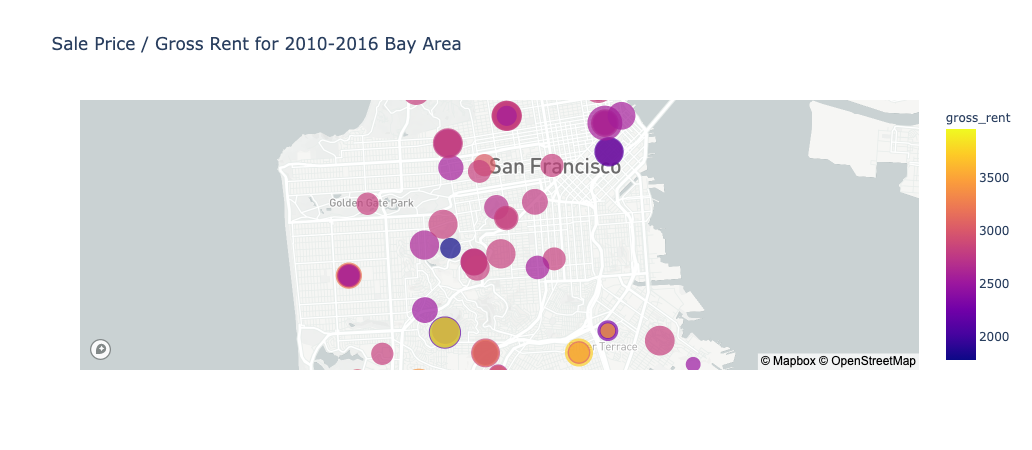

In [49]:
px.scatter_mapbox(
   final_neighborhood_df,
    lat = "Lat",
    lon = "Lon", 
    size = "sale_price_sqr_foot",
    color = "gross_rent",
    size_max = 25,
    zoom = 11,
    title = "Sale Price / Gross Rent for 2010-2016 Bay Area"
)

### Step 4: Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `size_max` parameter to “25”.
    * Set the `zoom` parameter to “11”.

### Step 5: Style and format the scatter plot to ensure a professionally styled visualization.


In [33]:
px.scatter_mapbox(
   final_neighborhood_df,
    lat = "Lat",
    lon = "Lon", 
    size = "sale_price_sqr_foot",
    color = "gross_rent",
    size_max = 25,
    zoom = 11,
    title = "Sale Price / Gross Rent for 2010-2016 Bay Area"
)

In [50]:
"""
I didn't want to choose the neighborhood with the highest gross rent by the scatter plot alone, 
so I am verifying by going through the dataframe itself as well
"""
highest_expenses_gross_rent = final_neighborhood_df.groupby('gross_rent').max()

highest_expenses_gross_rent.tail(5)

# The final value in this dataframe will be the maximum gross_rent neighborhood

,neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units
gross_rent,,,,,,
3414.0,Merced Heights,37.71993,-122.46595,2014.0,788.844818,380348.0
3528.0,Silver Terrace,37.73467,-122.40106,2014.0,170.292549,380348.0
3657.0,Visitacion Valley,37.72874,-122.41098,2014.5,301.466180,381321.5
3739.0,Bayview Heights,37.72874,-122.41098,2015.0,590.792839,382295.0
3959.0,Westwood Park,37.73415,-122.45700,2015.0,687.087575,382295.0


In [51]:
highest_expenses_sale_price = final_neighborhood_df.groupby('sale_price_sqr_foot').max()

highest_expenses_sale_price.tail(5)

,neighborhood,Lat,Lon,year,housing_units,gross_rent
sale_price_sqr_foot,,,,,,
687.087575,Westwood Park,37.73415,-122.45700,2015.00,382295.00,3959.000000
689.555817,Pacific Heights,37.79298,-122.43579,2013.00,378401.00,2817.285714
779.810842,Miraloma Park,37.73415,-122.45700,2011.75,375967.25,2155.250000
788.844818,Merced Heights,37.71993,-122.46595,2014.00,380348.00,3414.000000
903.993258,Union Square District,37.79101,-122.40210,2012.50,377427.50,2555.166667


### Step 7: Use the interactive map to answer the following question:

**Question** Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

**Answer** 

Westwood Park has the highest gross rent of the neighborhoods we analyzed

Union Square District had the highest average price per square foot of the neighborhoods we analyzed


## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer** 

Assuming that we can make assumptions about rental income growth solely off of gross rental prices, rental income growth grew significantly. Sale Prices also grew during the same time period of 2012-2016, but to a lesser degree. When comparing rental income growth to sale price growth, it becomes clear that rental income grew at a far greater rate than growth in sale prices between 2012 and 2016.

It is important to recognize that the previously stated trend should not be applied to individual neighborhoods without more specific analysis of each relative location. 

However, after asessing the relationship between gross rent price and sale price / square foot for a handful of neighborhoods, it does appear that many neighborhoods display a similar trend to the city as a whole, with regard to rental growth rates.

Despite the continued trend in rental income growth, there is much more deviation in sale price on a case by case basis. Both downard and upward reversals of price movement in sale price and rapid shifts in the rate (down or up) of price movement for some neighborhoods display clear deviations from the more general, city-wide trend

**Question** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer**

My company should be aware of the fact that some neighborhoods within their focus area have decreased in sale price while still providing solid growth in potential rental income. These neighborhoods that maintain the general trend of increasing rental price while diverging from the general trend in sale price due to downard sale price movement may be good investment opportunities. 

Here is a list of some of the neighborhoods that seem like good investment opportunities:

These neighborhoods exhibit one of the following patterns:
- growth in rental income with recent and continuing declines in sale price
- growth in rental income with relatively stable sale price value
- growth in rental income with continuously declining sale price


Ideal Neighborhoods:
- Westwood Park
- Visitacion Valley
- Van Ness / Civic Center
- South of Market
- South Beach
- Portrero Hill